In [ ]:
# importing all the necessary libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import ast

# Data Sourcing

In [ ]:
dataset= pd.read_excel("/content/drive/MyDrive/Colab Notebooks/squadstack/dataset.xlsx",sheet_name='Dataset')

In [ ]:
dataset.head()

,id,followup_date,lead_created_at,leadId,followup_type,agentId,additional_data
0,1,2020-03-05 14:38:54,2019-11-04 16:12:00-05:00,20293,calls,10,"{""duration"": 0, ""is_incoming"": False}"
1,2,2020-03-05 14:38:55,2019-11-04 16:12:00-05:00,20293,calls,10,"{""duration"": 0, ""is_incoming"" : False}"
2,3,2020-01-06 19:11:39,2019-12-26 08:30:32-05:00,49122,calls,4,"{'duration': 91, 'is_incoming': False}"
3,4,2020-08-31 13:12:53,2020-08-30 19:39:18-04:00,58040,calls,9,"{'duration': 0, 'is_incoming': False}"
4,5,2020-10-14 14:47:23,2017-01-28 11:04:00-05:00,36567,calls,9,"{'duration': 0, 'is_incoming': False}"


# Exploratory Data Analysis


In [ ]:
# Seperating the values in additional_data column
df1=pd.DataFrame(columns=['id','duration','is_incoming'])

In [ ]:
for i in dataset.index.values:
    df1.loc[i,'id']=dataset.loc[i,'id']
    dict_1=ast.literal_eval(dataset.loc[i,'additional_data'])
    for k in dict_1.keys():
        df1.loc[i,k]=dict_1[k]


In [ ]:
df1.head()

,id,duration,is_incoming
0,1,0,False
1,2,0,False
2,3,91,False
3,4,0,False
4,5,0,False


In [ ]:
#Merging the two dataframe df1 and dataset and eliminating the common column 
df=pd.merge(dataset,df1.drop_duplicates(['id']),how="outer") 
print(df.shape)
df.head()

(68354, 9)


,id,followup_date,lead_created_at,leadId,followup_type,agentId,additional_data,duration,is_incoming
0,1,2020-03-05 14:38:54,2019-11-04 16:12:00-05:00,20293,calls,10,"{""duration"": 0, ""is_incoming"": False}",0,False
1,2,2020-03-05 14:38:55,2019-11-04 16:12:00-05:00,20293,calls,10,"{""duration"": 0, ""is_incoming"" : False}",0,False
2,3,2020-01-06 19:11:39,2019-12-26 08:30:32-05:00,49122,calls,4,"{'duration': 91, 'is_incoming': False}",91,False
3,4,2020-08-31 13:12:53,2020-08-30 19:39:18-04:00,58040,calls,9,"{'duration': 0, 'is_incoming': False}",0,False
4,5,2020-10-14 14:47:23,2017-01-28 11:04:00-05:00,36567,calls,9,"{'duration': 0, 'is_incoming': False}",0,False


In [ ]:
# checking null values
df.isnull().sum()

id                     0
followup_date          0
lead_created_at        0
leadId                 0
followup_type          0
agentId                0
additional_data        0
duration           65049
is_incoming            0
dtype: int64

In [ ]:
df.duration.values

In [ ]:
#replacing all nan values in duration with zero
df['duration'] = df['duration'].fillna(0)


In [ ]:
df.shape

(68354, 9)

In [ ]:
df.agentId.unique()

array([10,  4,  9,  7,  8,  2,  6,  5,  3,  0])

In [ ]:
df.followup_type.unique()

array(['calls', 'emails', 'textmessages'], dtype=object)

In [ ]:
#handling Categorical values 
df.followup_type.replace(('calls','emails','textmessages'),(1,2,3),inplace=True)

# No. of Unique Lead each agent have: Feature 1

In [ ]:
df_unique_lead=df[['agentId','leadId']]
df_unique_lead=df_unique_lead.groupby(['agentId', 'leadId']).size().reset_index(name='lead_followup_count')
df_unique_lead



,agentId,leadId,lead_followup_count
0,0,2408,7
1,0,55289,2
2,0,56731,13
3,0,60730,82
4,0,61034,11
...,...,...,...
6798,10,62423,6
6799,10,62591,1
6800,10,62630,1
6801,10,62781,125


In [ ]:
df_agent_lead=df_unique_lead.reset_index()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


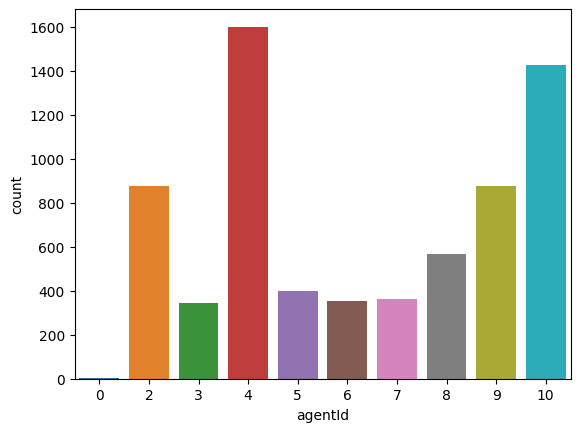

In [ ]:
#no. of unique leads per agent_graph
sns.countplot(df_agent_lead['agentId'])

In [ ]:
# Total_lead_count for each agentId 
df_agent_lead_count=df_agent_lead.groupby('agentId').size().reset_index(name='agent_lead_count')
df_agent_lead_count

,agentId,agent_lead_count
0,0,5
1,2,874
2,3,343
3,4,1599
4,5,398
5,6,351
6,7,364
7,8,568
8,9,876
9,10,1425


# no. of followup per agent have: feature 2

In [ ]:
# total followUp for each agentId
total_followup_by_agent_df = df.groupby('agentId').size().reset_index(name='Total_followup')
total_followup_by_agent_df

,agentId,Total_followup
0,0,115
1,2,4086
2,3,529
3,4,15290
4,5,11241
5,6,5606
6,7,7819
7,8,2732
8,9,9281
9,10,11655


In [ ]:
total_followup_by_agent_df.shape

(10, 2)

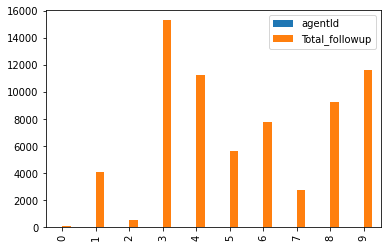

In [ ]:
# no. of followup per agent have
new_incoming_outgoing_graph = total_followup_by_agent_df.plot(kind='bar')

In [ ]:
total_followup_by_agent_df.reset_index()

,agentId,0
0,0,115
1,2,4086
2,3,529
3,4,15290
4,5,11241
5,6,5606
6,7,7819
7,8,2732
8,9,9281
9,10,11655


#Merging feature 1 and feature 2 in common DataFrame

In [ ]:
final_df_till_2_feature=pd.merge(df_agent_lead_count,total_followup_by_agent_df.drop_duplicates(['agentId']),how="outer") 
print(final_df_till_2_feature.shape)
final_df_till_2_feature.head()

(10, 3)


,agentId,agent_lead_count,Total_followup
0,0,5,115
1,2,874,4086
2,3,343,529
3,4,1599,15290
4,5,398,11241


# graph for incoming and outgoing per agent have:feature 3



In [ ]:
df_is_incoming=pd.get_dummies(df['is_incoming'])
df_is_incoming

,False,True
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
68349,0,1
68350,1,0
68351,1,0
68352,1,0


In [ ]:
df_is_incoming.columns = ['outgoing', 'incoming']

In [ ]:
feature_3_df= pd.concat([df,df_is_incoming],axis=1)
feature_3_df

,id,followup_date,lead_created_at,leadId,followup_type,agentId,additional_data,duration,is_incoming,outgoing,incoming
0,1,2020-03-05 14:38:54,2019-11-04 16:12:00-05:00,20293,1,10,"{""duration"": 0, ""is_incoming"": False}",0,False,1,0
1,2,2020-03-05 14:38:55,2019-11-04 16:12:00-05:00,20293,1,10,"{""duration"": 0, ""is_incoming"" : False}",0,False,1,0
2,3,2020-01-06 19:11:39,2019-12-26 08:30:32-05:00,49122,1,4,"{'duration': 91, 'is_incoming': False}",91,False,1,0
3,4,2020-08-31 13:12:53,2020-08-30 19:39:18-04:00,58040,1,9,"{'duration': 0, 'is_incoming': False}",0,False,1,0
4,5,2020-10-14 14:47:23,2017-01-28 11:04:00-05:00,36567,1,9,"{'duration': 0, 'is_incoming': False}",0,False,1,0
...,...,...,...,...,...,...,...,...,...,...,...
68349,68350,2020-03-11 21:10:18,2018-03-17 09:09:00-04:00,31965,3,4,{'is_incoming': True},0,True,0,1
68350,68351,2020-03-11 21:11:12,2018-03-17 09:09:00-04:00,31965,3,4,{'is_incoming': False},0,False,1,0
68351,68352,2020-03-20 17:08:10,2018-03-17 09:09:00-04:00,31965,3,4,{'is_incoming': False},0,False,1,0
68352,68353,2020-06-05 15:24:48,2017-12-05 05:10:00-05:00,27972,3,7,{'is_incoming': False},0,False,1,0


In [ ]:
feature_3_df_count=feature_3_df.groupby(['agentId', 'outgoing', 'incoming']).size().reset_index(name='counts')
feature_3_df_count



,agentId,outgoing,incoming,counts
0,0,0,1,115
1,2,0,1,341
2,2,1,0,3745
3,3,0,1,24
4,3,1,0,505
5,4,0,1,3405
6,4,1,0,11885
7,5,0,1,133
8,5,1,0,11108
9,6,0,1,2257


In [ ]:
feature_3_df_incoming_count=feature_3_df.groupby(['agentId', 'incoming']).size().reset_index(name='incoming_counts')
feature_3_df_incoming_count

,agentId,incoming,incoming_counts
0,0,1,115
1,2,0,3745
2,2,1,341
3,3,0,505
4,3,1,24
5,4,0,11885
6,4,1,3405
7,5,0,11108
8,5,1,133
9,6,0,3349


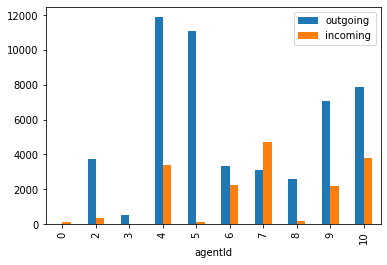

In [ ]:
# graph for incoming and outgoing per agent have
feature_3_df.groupby(['agentId', 'is_incoming' ]).size().unstack(level=1).plot(kind='bar')
plt.legend(['outgoing', 'incoming'], loc='upper right')


In [ ]:
 feature_3_df

,id,followup_date,lead_created_at,leadId,followup_type,agentId,additional_data,duration,is_incoming,outgoing,incoming
0,1,2020-03-05 14:38:54,2019-11-04 16:12:00-05:00,20293,1,10,"{""duration"": 0, ""is_incoming"": False}",0,False,1,0
1,2,2020-03-05 14:38:55,2019-11-04 16:12:00-05:00,20293,1,10,"{""duration"": 0, ""is_incoming"" : False}",0,False,1,0
2,3,2020-01-06 19:11:39,2019-12-26 08:30:32-05:00,49122,1,4,"{'duration': 91, 'is_incoming': False}",91,False,1,0
3,4,2020-08-31 13:12:53,2020-08-30 19:39:18-04:00,58040,1,9,"{'duration': 0, 'is_incoming': False}",0,False,1,0
4,5,2020-10-14 14:47:23,2017-01-28 11:04:00-05:00,36567,1,9,"{'duration': 0, 'is_incoming': False}",0,False,1,0
...,...,...,...,...,...,...,...,...,...,...,...
68349,68350,2020-03-11 21:10:18,2018-03-17 09:09:00-04:00,31965,3,4,{'is_incoming': True},0,True,0,1
68350,68351,2020-03-11 21:11:12,2018-03-17 09:09:00-04:00,31965,3,4,{'is_incoming': False},0,False,1,0
68351,68352,2020-03-20 17:08:10,2018-03-17 09:09:00-04:00,31965,3,4,{'is_incoming': False},0,False,1,0
68352,68353,2020-06-05 15:24:48,2017-12-05 05:10:00-05:00,27972,3,7,{'is_incoming': False},0,False,1,0


### Extracting incoming column from feature_3_df DataFrame 





In [ ]:
feature_3_df_incoming = feature_3_df[['agentId','incoming']]


In [ ]:
feature_3_df_incoming_slice=feature_3_df_incoming.drop(feature_3_df_incoming[feature_3_df_incoming['incoming'] == 0].index, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
feature_3_df_incoming =feature_3_df_incoming.groupby(['agentId', 'incoming']).size().reset_index(name='incoming_counts')

In [ ]:
feature_3_df_incoming

,agentId,incoming,incoming_counts
0,0,1,115
1,2,1,341
2,3,1,24
3,4,1,3405
4,5,1,133
5,6,1,2257
6,7,1,4711
7,8,1,160
8,9,1,2215
9,10,1,3780


### Extracting outcoming column from feature_3_df DataFrame 


In [ ]:
feature_3_df_outgoing =feature_3_df_incoming = feature_3_df[['agentId','outgoing']]

feature_3_df_outgoing.drop(feature_3_df_outgoing[feature_3_df_outgoing['outgoing'] == 0].index, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
feature_3_df_outgoing =feature_3_df_outgoing.groupby(['agentId', 'outgoing']).size().reset_index(name='outgoing_counts')

In [ ]:
feature_3_df_outgoing

,agentId,outgoing,outgoing_counts
0,2,1,3745
1,3,1,505
2,4,1,11885
3,5,1,11108
4,6,1,3349
5,7,1,3108
6,8,1,2572
7,9,1,7066
8,10,1,7875


# Merging all feature1,2,3 in common DataFrame

In [ ]:
final_df_till_3_feature=pd.merge(final_df_till_2_feature,feature_3_df_outgoing, on = "agentId", how="outer") 

In [ ]:
final_df_till_3_feature

,agentId,agent_lead_count,Total_followup,outgoing,outgoing_counts
0,0,5,115,NaN,NaN
1,2,874,4086,1.0,3745.0
2,3,343,529,1.0,505.0
3,4,1599,15290,1.0,11885.0
4,5,398,11241,1.0,11108.0
5,6,351,5606,1.0,3349.0
6,7,364,7819,1.0,3108.0
7,8,568,2732,1.0,2572.0
8,9,876,9281,1.0,7066.0
9,10,1425,11655,1.0,7875.0


In [ ]:
final_df_till_3_feature.drop('outgoing',axis=1,inplace=True)

In [ ]:
final_df_till_3_feature

,agentId,agent_lead_count,Total_followup,outgoing_counts
0,0,5,115,NaN
1,2,874,4086,3745.0
2,3,343,529,505.0
3,4,1599,15290,11885.0
4,5,398,11241,11108.0
5,6,351,5606,3349.0
6,7,364,7819,3108.0
7,8,568,2732,2572.0
8,9,876,9281,7066.0
9,10,1425,11655,7875.0


In [ ]:
feature_3_df_incoming

,agentId,outgoing
0,10,1
1,10,1
2,4,1
3,9,1
4,9,1
...,...,...
68348,4,1
68350,4,1
68351,4,1
68352,7,1


In [ ]:
final_df_till_3_feature_1=pd.merge(final_df_till_3_feature,feature_3_df_incoming, on = "agentId", how="outer") 
final_df_till_3_feature_1

,agentId,agent_lead_count,Total_followup,outgoing_counts,incoming,incoming_counts
0,0,5,115,NaN,1,115
1,2,874,4086,3745.0,1,341
2,3,343,529,505.0,1,24
3,4,1599,15290,11885.0,1,3405
4,5,398,11241,11108.0,1,133
5,6,351,5606,3349.0,1,2257
6,7,364,7819,3108.0,1,4711
7,8,568,2732,2572.0,1,160
8,9,876,9281,7066.0,1,2215
9,10,1425,11655,7875.0,1,3780


In [ ]:
final_df_till_3_feature_1.drop('incoming',axis=1,inplace=True)

In [ ]:
final_df_till_3_feature_1['outgoing_counts'] = final_df_till_3_feature_1['outgoing_counts'].fillna(0)
final_df_till_3_feature_1

,agentId,agent_lead_count,Total_followup,outgoing_counts,incoming_counts
0,0,5,115,0.0,115
1,2,874,4086,3745.0,341
2,3,343,529,505.0,24
3,4,1599,15290,11885.0,3405
4,5,398,11241,11108.0,133
5,6,351,5606,3349.0,2257
6,7,364,7819,3108.0,4711
7,8,568,2732,2572.0,160
8,9,876,9281,7066.0,2215
9,10,1425,11655,7875.0,3780


#feature 4

# Different FollowUp Types each Agent have

In [ ]:

feature_4_df = df.groupby(['agentId', 'followup_type']).size().reset_index(name='Total_followup_by_each_type')

In [ ]:
feature_4_df

,agentId,followup_type,Total_followup_by_each_type
0,0,3,115
1,2,1,65
2,2,2,3706
3,2,3,315
4,3,2,516
5,3,3,13
6,4,1,1087
7,4,2,7140
8,4,3,7063
9,5,1,6


In [ ]:
feature_3_df_incoming = feature_3_df
feature_3_df_incoming.drop(feature_3_df_incoming[feature_3_df_incoming['incoming'] == 0].index, inplace = True)

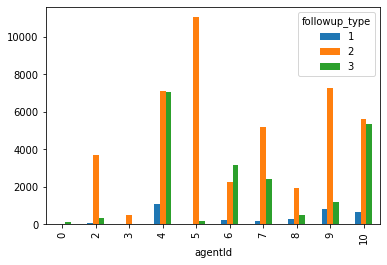

In [ ]:
# graph for different type of followup each agent have
feature_4_df.unstack(level=1).plot(kind='bar')

### Extracting each followUp type from dataFrame 

### Extracting each followUp type call

In [ ]:
feature_4_df_call = feature_4_df[['agentId','followup_type','Total_followup_by_each_type']]
feature_4_df_call 

,agentId,followup_type,Total_followup_by_each_type
0,0,3,115
1,2,1,65
2,2,2,3706
3,2,3,315
4,3,2,516
5,3,3,13
6,4,1,1087
7,4,2,7140
8,4,3,7063
9,5,1,6


In [ ]:
feature_4_df_call.drop(feature_4_df_call[feature_4_df_call['followup_type'] != 1].index, inplace = True)


In [ ]:
feature_4_df_call

,agentId,followup_type,Total_followup_by_each_type
1,2,1,65
6,4,1,1087
9,5,1,6
12,6,1,210
15,7,1,183
18,8,1,293
21,9,1,814
24,10,1,647


In [ ]:
feature_4_df_call.rename(columns ={'Total_followup_by_each_type':'Total_followup_by_call'}, inplace = False)


,agentId,followup_type,Total_followup_by_call
1,2,1,65
6,4,1,1087
9,5,1,6
12,6,1,210
15,7,1,183
18,8,1,293
21,9,1,814
24,10,1,647


### Extracting each followUp type mail

In [ ]:
feature_4_df_mail = feature_4_df[['agentId','followup_type','Total_followup_by_each_type']]
feature_4_df_mail 

,agentId,followup_type,Total_followup_by_each_type
0,0,3,115
1,2,1,65
2,2,2,3706
3,2,3,315
4,3,2,516
5,3,3,13
6,4,1,1087
7,4,2,7140
8,4,3,7063
9,5,1,6


In [ ]:
feature_4_df_mail.drop(feature_4_df_mail[feature_4_df_mail['followup_type'] != 2].index, inplace = True)


In [ ]:
feature_4_df_mail.rename(columns ={'Total_followup_by_each_type':'Total_followup_by_mail'}, inplace = False)


,agentId,followup_type,Total_followup_by_mail
2,2,2,3706
4,3,2,516
7,4,2,7140
10,5,2,11065
13,6,2,2256
16,7,2,5207
19,8,2,1945
22,9,2,7292
25,10,2,5630


### Extracting each followUp type text

In [ ]:
feature_4_df_text = feature_4_df[['agentId','followup_type','Total_followup_by_each_type']]
feature_4_df_text 

,agentId,followup_type,Total_followup_by_each_type
0,0,3,115
1,2,1,65
2,2,2,3706
3,2,3,315
4,3,2,516
5,3,3,13
6,4,1,1087
7,4,2,7140
8,4,3,7063
9,5,1,6


In [ ]:
feature_4_df_text.drop(feature_4_df_text[feature_4_df_text['followup_type'] !=3].index, inplace = True)


In [ ]:
feature_4_df_text.rename(columns ={'Total_followup_by_each_type':'Total_followup_by_text'}, inplace = False)


,agentId,followup_type,Total_followup_by_text
0,0,3,115
3,2,3,315
5,3,3,13
8,4,3,7063
11,5,3,170
14,6,3,3140
17,7,3,2429
20,8,3,494
23,9,3,1175
26,10,3,5378


# merging feature 1, 2, 3, 4

In [ ]:
feature_4_df_merge=pd.merge(feature_4_df_call,feature_4_df_mail, on = "agentId", how="outer") 
feature_4_df_merge

,agentId,followup_type_x,Total_followup_by_each_type_x,followup_type_y,Total_followup_by_each_type_y
0,2,1.0,65.0,2,3706
1,4,1.0,1087.0,2,7140
2,5,1.0,6.0,2,11065
3,6,1.0,210.0,2,2256
4,7,1.0,183.0,2,5207
5,8,1.0,293.0,2,1945
6,9,1.0,814.0,2,7292
7,10,1.0,647.0,2,5630
8,3,NaN,NaN,2,516


In [ ]:
feature_4_df_merge_all=pd.merge(feature_4_df_merge,feature_4_df_text, on = "agentId", how="outer") 
feature_4_df_merge_all

,agentId,followup_type_x,Total_followup_by_each_type_x,followup_type_y,Total_followup_by_each_type_y,followup_type,Total_followup_by_each_type
0,2,1.0,65.0,2.0,3706.0,3,315
1,4,1.0,1087.0,2.0,7140.0,3,7063
2,5,1.0,6.0,2.0,11065.0,3,170
3,6,1.0,210.0,2.0,2256.0,3,3140
4,7,1.0,183.0,2.0,5207.0,3,2429
5,8,1.0,293.0,2.0,1945.0,3,494
6,9,1.0,814.0,2.0,7292.0,3,1175
7,10,1.0,647.0,2.0,5630.0,3,5378
8,3,NaN,NaN,2.0,516.0,3,13
9,0,NaN,NaN,NaN,NaN,3,115


In [ ]:
feature_4_df_merge_all.drop(['followup_type_x','followup_type_y','followup_type'],axis=1,inplace=True)

In [ ]:
feature_4_df_merge_all

,agentId,Total_followup_by_each_type_x,Total_followup_by_each_type_y,Total_followup_by_each_type
0,2,65.0,3706.0,315
1,4,1087.0,7140.0,7063
2,5,6.0,11065.0,170
3,6,210.0,2256.0,3140
4,7,183.0,5207.0,2429
5,8,293.0,1945.0,494
6,9,814.0,7292.0,1175
7,10,647.0,5630.0,5378
8,3,NaN,516.0,13
9,0,NaN,NaN,115


In [ ]:
feature_4_df_merge_all=feature_4_df_merge_all.rename(columns ={'Total_followup_by_each_type_x':'Total_followup_by_call','Total_followup_by_each_type_y':'Total_followup_by_mail','Total_followup_by_each_type':'Total_followup_by_text'}, inplace = False)


In [ ]:
feature_4_df_merge_all

,agentId,Total_followup_by_call,Total_followup_by_mail,Total_followup_by_text
0,2,65.0,3706.0,315
1,4,1087.0,7140.0,7063
2,5,6.0,11065.0,170
3,6,210.0,2256.0,3140
4,7,183.0,5207.0,2429
5,8,293.0,1945.0,494
6,9,814.0,7292.0,1175
7,10,647.0,5630.0,5378
8,3,NaN,516.0,13
9,0,NaN,NaN,115


In [ ]:
final_df_till_3_feature_1

,agentId,agent_lead_count,Total_followup,outgoing_counts,incoming_counts
0,0,5,115,0.0,115
1,2,874,4086,3745.0,341
2,3,343,529,505.0,24
3,4,1599,15290,11885.0,3405
4,5,398,11241,11108.0,133
5,6,351,5606,3349.0,2257
6,7,364,7819,3108.0,4711
7,8,568,2732,2572.0,160
8,9,876,9281,7066.0,2215
9,10,1425,11655,7875.0,3780


In [ ]:
final_df_till_4_feature_new=pd.merge(final_df_till_3_feature_1,feature_4_df_merge_all, on = "agentId", how="outer") 
final_df_till_4_feature_new

,agentId,agent_lead_count,Total_followup,outgoing_counts,incoming_counts,Total_followup_by_call,Total_followup_by_mail,Total_followup_by_text
0,0,5,115,0.0,115,NaN,NaN,115
1,2,874,4086,3745.0,341,65.0,3706.0,315
2,3,343,529,505.0,24,NaN,516.0,13
3,4,1599,15290,11885.0,3405,1087.0,7140.0,7063
4,5,398,11241,11108.0,133,6.0,11065.0,170
5,6,351,5606,3349.0,2257,210.0,2256.0,3140
6,7,364,7819,3108.0,4711,183.0,5207.0,2429
7,8,568,2732,2572.0,160,293.0,1945.0,494
8,9,876,9281,7066.0,2215,814.0,7292.0,1175
9,10,1425,11655,7875.0,3780,647.0,5630.0,5378


#handleing duration:feature 5




In [ ]:
df_duration= df[['agentId','duration']]
df_duration

,agentId,duration
0,10,0
1,10,0
2,4,91
3,9,0
4,9,0
...,...,...
68349,4,0
68350,4,0
68351,4,0
68352,7,0


In [ ]:
df_duration_index= df_duration.groupby(['agentId']).sum()
df_duration_index_1=df_duration_index.reset_index()

In [ ]:
# Total call duration each agentId have 
df_duration_index_1.sort_values('duration', ascending=False)

,agentId,duration
3,4,74545
9,10,46924
7,8,22414
8,9,18504
5,6,18177
6,7,8464
1,2,4631
0,0,0
2,3,0
4,5,0


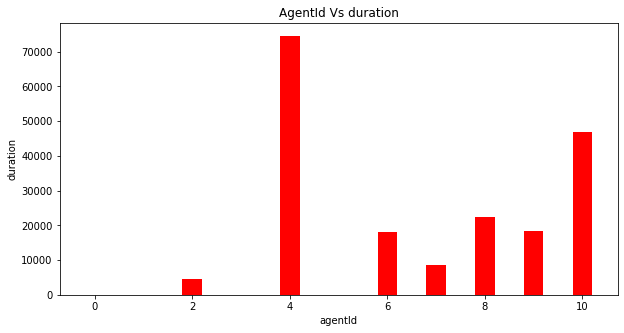

In [ ]:
#graph for Total call duration each agentId have 

df_duration_index_garph=df_duration_index_1.sort_values('duration', ascending=False)
fig = plt.figure(figsize = (10, 5))
 
plt.bar(df_duration_index_garph.agentId, df_duration_index_garph.duration, color ='red',
        width = 0.4)
 

plt.xlabel("agentId")
plt.ylabel("duration")
plt.title("AgentId Vs duration")
plt.show()

In [ ]:
df_duration_index_1

,agentId,duration
0,0,0
1,2,4631
2,3,0
3,4,74545
4,5,0
5,6,18177
6,7,8464
7,8,22414
8,9,18504
9,10,46924


# Merging all the features

In [ ]:
final_df_till_5_feature=pd.merge(final_df_till_4_feature_new,df_duration_index_1, on = "agentId", how="outer") 
final_df_till_5_feature

,agentId,agent_lead_count,Total_followup,outgoing_counts,incoming_counts,Total_followup_by_call,Total_followup_by_mail,Total_followup_by_text,duration
0,0,5,115,0.0,115,NaN,NaN,115,0
1,2,874,4086,3745.0,341,65.0,3706.0,315,4631
2,3,343,529,505.0,24,NaN,516.0,13,0
3,4,1599,15290,11885.0,3405,1087.0,7140.0,7063,74545
4,5,398,11241,11108.0,133,6.0,11065.0,170,0
5,6,351,5606,3349.0,2257,210.0,2256.0,3140,18177
6,7,364,7819,3108.0,4711,183.0,5207.0,2429,8464
7,8,568,2732,2572.0,160,293.0,1945.0,494,22414
8,9,876,9281,7066.0,2215,814.0,7292.0,1175,18504
9,10,1425,11655,7875.0,3780,647.0,5630.0,5378,46924


# final_dataset

In [ ]:
final_df_till_3_feature=pd.merge(final_df_till_2_feature,feature_3_df_outgoing,feature_3_df_incoming.drop_duplicates(['agentId']),how="outer") 
print(final_df_till_3_feature.shape)
final_df_till_3_feature.head()

In [ ]:
final_dataset=final_df_till_5_feature.fillna(0)

In [ ]:
final_dataset

,agentId,agent_lead_count,Total_followup,outgoing_counts,incoming_counts,Total_followup_by_call,Total_followup_by_mail,Total_followup_by_text,duration
0,0,5,115,0.0,115,0.0,0.0,115,0
1,2,874,4086,3745.0,341,65.0,3706.0,315,4631
2,3,343,529,505.0,24,0.0,516.0,13,0
3,4,1599,15290,11885.0,3405,1087.0,7140.0,7063,74545
4,5,398,11241,11108.0,133,6.0,11065.0,170,0
5,6,351,5606,3349.0,2257,210.0,2256.0,3140,18177
6,7,364,7819,3108.0,4711,183.0,5207.0,2429,8464
7,8,568,2732,2572.0,160,293.0,1945.0,494,22414
8,9,876,9281,7066.0,2215,814.0,7292.0,1175,18504
9,10,1425,11655,7875.0,3780,647.0,5630.0,5378,46924


In [ ]:
final_dataset.dtypes

agentId                     int64
agent_lead_count            int64
Total_followup              int64
outgoing_counts           float64
incoming_counts             int64
Total_followup_by_call    float64
Total_followup_by_mail    float64
Total_followup_by_text      int64
duration                    int64
dtype: object

In [ ]:
# type casting the data Frame into int 
final_dataset = final_dataset.astype(int)

In [ ]:
final_dataset

,agentId,agent_lead_count,Total_followup,outgoing_counts,incoming_counts,Total_followup_by_call,Total_followup_by_mail,Total_followup_by_text,duration
0,0,5,115,0,115,0,0,115,0
1,2,874,4086,3745,341,65,3706,315,4631
2,3,343,529,505,24,0,516,13,0
3,4,1599,15290,11885,3405,1087,7140,7063,74545
4,5,398,11241,11108,133,6,11065,170,0
5,6,351,5606,3349,2257,210,2256,3140,18177
6,7,364,7819,3108,4711,183,5207,2429,8464
7,8,568,2732,2572,160,293,1945,494,22414
8,9,876,9281,7066,2215,814,7292,1175,18504
9,10,1425,11655,7875,3780,647,5630,5378,46924


In [ ]:
final_dataset.describe()

,agentId,agent_lead_count,Total_followup,outgoing_counts,incoming_counts,Total_followup_by_call,Total_followup_by_mail,Total_followup_by_text,duration
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,5.400000,680.300000,6835.400000,5121.300000,1714.100000,330.500000,4475.700000,2029.200000,19365.900000
std,3.204164,510.446003,5076.191906,4164.378466,1790.971273,385.597732,3463.318673,2475.617714,24213.660449
min,0.000000,5.000000,115.000000,0.000000,24.000000,0.000000,0.000000,13.000000,0.000000
25%,3.250000,354.250000,3070.500000,2706.000000,139.750000,20.750000,2022.750000,206.250000,1157.750000
50%,5.500000,483.000000,6712.500000,3547.000000,1278.000000,196.500000,4456.500000,834.500000,13320.500000
75%,7.750000,875.500000,10751.000000,7672.750000,3118.000000,558.500000,6762.500000,2962.250000,21436.500000
max,10.000000,1599.000000,15290.000000,11885.000000,4711.000000,1087.000000,11065.000000,7063.000000,74545.000000


In [ ]:
print(final_dataset.corr(method='pearson'))

                         agentId  ...  duration
agentId                 1.000000  ...  0.350988
agent_lead_count        0.391224  ...  0.869911
Total_followup          0.466691  ...  0.707752
outgoing_counts         0.335621  ...  0.613357
incoming_counts         0.542365  ...  0.579816
Total_followup_by_call  0.480410  ...  0.888755
Total_followup_by_mail  0.386792  ...  0.278829
Total_followup_by_text  0.341000  ...  0.922724
duration                0.350988  ...  1.000000

[9 rows x 9 columns]


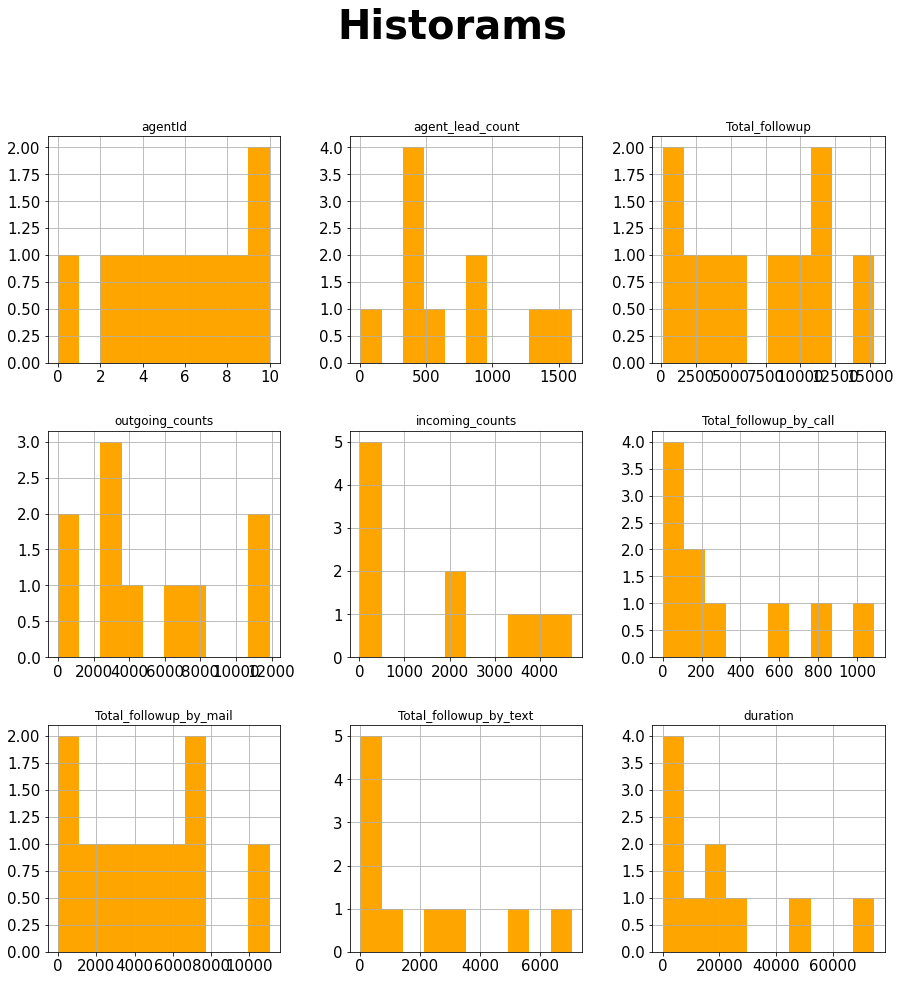

In [ ]:
# Plotting the Histogram
final_dataset.hist(sharex=False, sharey=False, xlabelsize=15, ylabelsize=15, color='orange', figsize=(15,15))
plt.suptitle("Historams", y=1.00, fontweight='bold', fontsize=40)
plt.show()

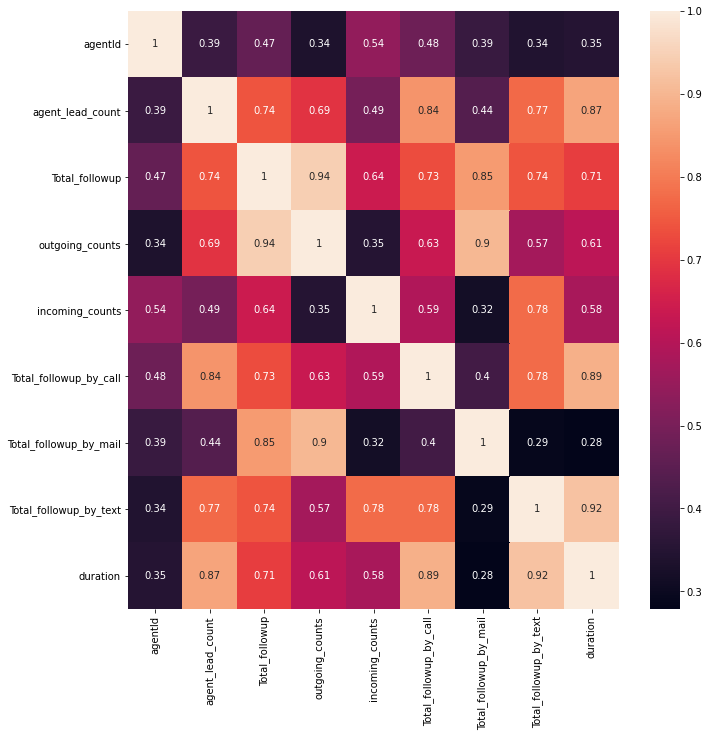

In [ ]:
# Heatmap is an effective way for identifying correlated features
plt.figure(figsize=(11,11))
plt.style.use('default')
sns.heatmap(final_dataset.corr(), annot= True)

# Finding Important Features

In [ ]:
X=final_dataset.iloc[:,0]

In [ ]:
X.head()

0    0
1    2
2    3
3    4
4    5
Name: agentId, dtype: int64

In [ ]:
Y=final_dataset.loc[:,['agent_lead_count', 'Total_followup', 'outgoing_counts',
       'incoming_counts', 'Total_followup_by_call', 'Total_followup_by_mail',
       'Total_followup_by_text', 'duration']]

In [ ]:
Y

,agent_lead_count,Total_followup,outgoing_counts,incoming_counts,Total_followup_by_call,Total_followup_by_mail,Total_followup_by_text,duration
0,5,115,0,115,0,0,115,0
1,874,4086,3745,341,65,3706,315,4631
2,343,529,505,24,0,516,13,0
3,1599,15290,11885,3405,1087,7140,7063,74545
4,398,11241,11108,133,6,11065,170,0
5,351,5606,3349,2257,210,2256,3140,18177
6,364,7819,3108,4711,183,5207,2429,8464
7,568,2732,2572,160,293,1945,494,22414
8,876,9281,7066,2215,814,7292,1175,18504
9,1425,11655,7875,3780,647,5630,5378,46924


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(Y, X)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
important_features=print(selection.feature_importances_)


[0.10466592 0.12134946 0.17072176 0.0958229  0.18255592 0.07277932
 0.08136802 0.1707367 ]


In [ ]:
important_features

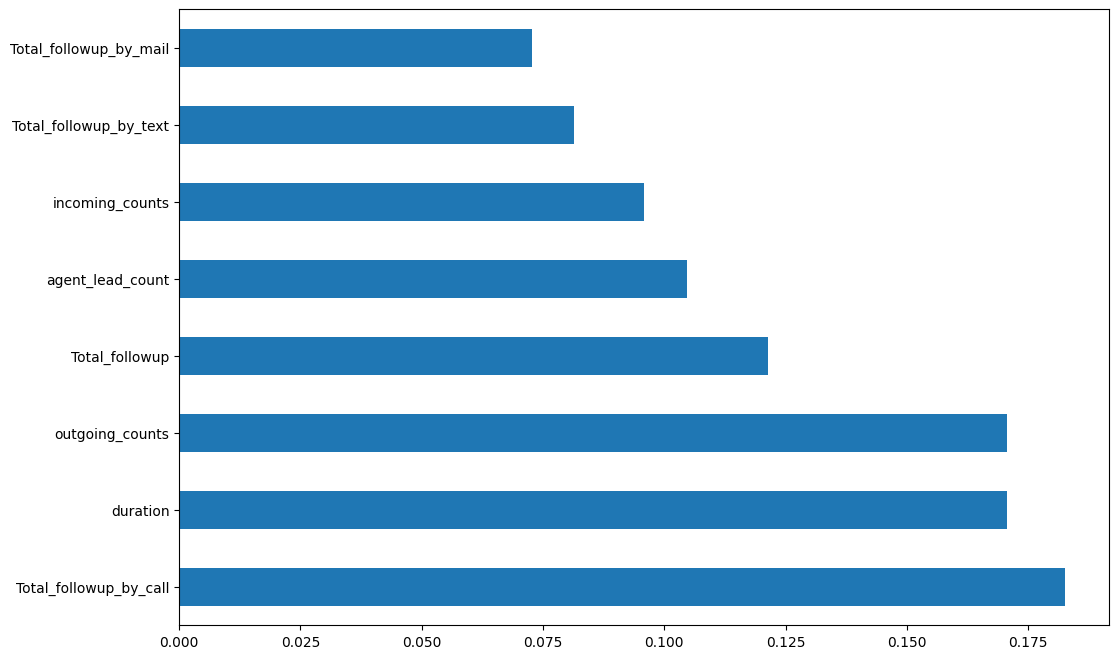

In [ ]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=Y.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

In [ ]:
feat_importances

agent_lead_count          0.104666
Total_followup            0.121349
outgoing_counts           0.170722
incoming_counts           0.095823
Total_followup_by_call    0.182556
Total_followup_by_mail    0.072779
Total_followup_by_text    0.081368
duration                  0.170737
dtype: float64

# Calculating agent_mean_weight for Recommendation

In [ ]:
agent_mean_weight = []
def getTopAgents():
  #columns = list(Y)
  for index,row in Y.iterrows():
    total_weight_value = 0
    for col in list(Y):
      total_weight_value += (row[col] * feat_importances[col])
    
    agent_mean_weight.append(total_weight_value/len(list(Y)))
    

In [ ]:
getTopAgents()

Original weight value 34.85547309833024
4.35693413729128
Original weight value 2357.2394260204082
294.65492825255103
Original weight value 227.22042967944753
28.40255370993094
Original weight value 18398.451713564216
2299.806464195527
Original weight value 4135.099215496805
516.8874019371007
Original weight value 5066.545815811174
633.3182269763968
Original weight value 4024.082794140384
503.010349267548
Original weight value 4907.537951195631
613.4422438994538
Original weight value 6570.726115362813
821.3407644203517
Original weight value 12247.22889159452
1530.903611449315


In [ ]:
getTopAgents()


In [ ]:
agent_mean_weight


[4.35693413729128,
 294.65492825255103,
 28.40255370993094,
 2299.806464195527,
 516.8874019371007,
 633.3182269763968,
 503.010349267548,
 613.4422438994538,
 821.3407644203517,
 1530.903611449315]

In [ ]:
# converting list into dataFrame
agent_mean_weight_df = pd.DataFrame(agent_mean_weight)

In [ ]:
agent_mean_weight_df.columns = ["agent_mean_weight_df"]

In [ ]:
agent_mean_weight_df

,agent_mean_weight_df
0,4.356934
1,294.654928
2,28.402554
3,2299.806464
4,516.887402
5,633.318227
6,503.010349
7,613.442244
8,821.340764
9,1530.903611


In [ ]:
#final_dataset
final_dataset_merge=pd.merge(final_dataset,agent_mean_weight_df, left_index=True, right_index=True)
final_dataset_merge

,agentId,agent_lead_count,Total_followup,outgoing_counts,incoming_counts,Total_followup_by_call,Total_followup_by_mail,Total_followup_by_text,duration,agent_mean_weight_df
0,0,5,115,0,115,0,0,115,0,4.356934
1,2,874,4086,3745,341,65,3706,315,4631,294.654928
2,3,343,529,505,24,0,516,13,0,28.402554
3,4,1599,15290,11885,3405,1087,7140,7063,74545,2299.806464
4,5,398,11241,11108,133,6,11065,170,0,516.887402
5,6,351,5606,3349,2257,210,2256,3140,18177,633.318227
6,7,364,7819,3108,4711,183,5207,2429,8464,503.010349
7,8,568,2732,2572,160,293,1945,494,22414,613.442244
8,9,876,9281,7066,2215,814,7292,1175,18504,821.340764
9,10,1425,11655,7875,3780,647,5630,5378,46924,1530.903611


# Graph for Top Agents for Recomendation

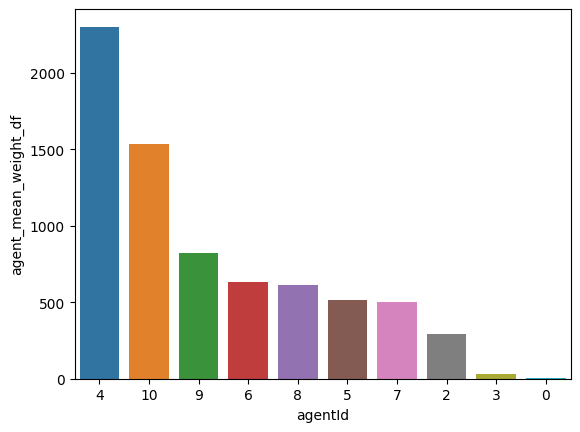

In [ ]:
sns.barplot(x='agentId',y= "agent_mean_weight_df", data = final_dataset_merge, order=final_dataset_merge.sort_values('agent_mean_weight_df', ascending = False).agentId)

# Top 3 Agents

In [ ]:
final_dataset_merge[['agentId','agent_mean_weight_df']].sort_values('agent_mean_weight_df',ascending= False)[:3]

,agentId,agent_mean_weight_df
3,4,2299.806464
9,10,1530.903611
8,9,821.340764
